In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

with open('../plfs/perv1.map.yaml', 'r') as fin:
    schema = yaml.safe_load(fin)
MULT = 'subsample_multiplier'
df = pd.read_parquet('data/perv1.parquet')
df.head()

stratum  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number           
Q1           V1    rural  10002 1                   1                           01                      01                        01   
                                                                                                        02                        01   
                                                                                                        03                        01   
                                                                                                        04                        01   
                                                                                                        05                        01   

                                                                                                                             sub_stratum  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number               
Q1           V1    rural  10002 1                   1                           01                      01                            14   
                                                                                                        02                            14   
                                                                                                        03                            14   
                                                                                                        04                            14   
                                                                                                        05                            14   

                                                                                                                             sub_sample  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number              
Q1           V1    rural  10002 1                   1                           01                      01                            1   
                                                                                                        02                            1   
                                                                                                        03                            1   
                                                                                                        04                            1   
                                                                                                        05                            1   

                                                                                                                             fod_sub_region  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number                  
Q1           V1    rural  10002 1                   1                           01                      01                             0213   
                                                                                                        02                             0213   
                                                                                                        03                             0213   
                                                                                                        04                             0213   
                                                                                                        05                             0213   

                                                                                                                              ns_count_sector_stratum_substratum_subsample  \
year_quarter visit sector fsu   sample_sg

> Many who once faced barriers like lack of education or technical skills, now earn 15k to 45k or even more.

In [24]:
SELF_EMPLOYED = [11, 12, 21, 61, 62]
SALARIED = [31, 71, 72]
CASUAL = [41, 42, 51]
UNEMPLOYED = [81]
work_status = {v: k for k, v in schema['b6q5_perv1']['categories'].items()}
cws = df['current_weekly_status_code'].map(work_status).astype(int)

In [27]:
# How is education distributed across the three types of work?
# Urban males of working age, _in_ the workforce
df['cws'] = cws

xdf = df[df.index.get_level_values(2) == 'urban']
xdf = xdf[xdf['cws'].isin(SELF_EMPLOYED + SALARIED + CASUAL + UNEMPLOYED)]
xdf = xdf[xdf['gender'] == 'male']
xdf = xdf[xdf['age'] >= 15]

z = xdf.groupby(['general_education', 'cws']).apply(lambda x: x[MULT].sum() / xdf[MULT].sum()).unstack()
z

cws,11,12,21,31,41,42,51,61,62,71,72,81
general_education,,,,,,,,,,,,
below primary,0.011380,0.000848,0.000844,0.009289,NaN,0.000042,0.009524,0.000087,0.000520,0.000013,0.000108,5.033575e-04
diploma/certificate course,0.004802,0.002578,0.000647,0.020961,NaN,NaN,0.001068,0.000125,0.000549,0.000035,0.000303,2.664449e-03
graduate,0.037061,0.019112,0.012646,0.127020,0.000032,NaN,0.002239,0.000083,0.001346,0.000428,0.001455,2.141817e-02
higher secondary,0.033736,0.010355,0.008575,0.057540,NaN,NaN,0.008453,0.000096,0.000834,0.000144,0.000906,6.720241e-03
literate without formal schooling : EGS/ NFEC/ AEC,0.000245,0.000016,NaN,0.000154,NaN,NaN,0.000138,NaN,0.000086,NaN,NaN,NaN
middle,0.060723,0.009619,0.007663,0.075366,0.000038,NaN,0.034475,0.000494,0.002627,0.000402,0.001174,8.149076e-03
not literate,0.027071,0.001759,0.001428,0.016846,0.000014,0.000028,0.023857,0.000277,0.001327,0.000015,0.000229,1.960761e-03
others,0.000020,NaN,NaN,0.000039,NaN,NaN,0.000046,NaN,NaN,NaN,NaN,8.924801e-07
postgraduate and above,0.010007,0.005934,0.002510,0.045028,NaN,NaN,0.000219,0.000093,0.000360,0.000021,0.001165,4.635521e-03


In [31]:
# p = z / z.sum(axis=1).values.reshape(-1, 1)
p2 = z.fillna(value=0)
for cols, name in zip([SELF_EMPLOYED, SALARIED, CASUAL, UNEMPLOYED], ['SELF_EMPLOYED', 'SALARIED', 'CASUAL', 'UNEMPLOYED']):
    p2[name] = p2[cols].sum(axis=1)
    p2.drop(cols, axis=1, inplace=True)

In [32]:
p2

cws,SELF_EMPLOYED,SALARIED,CASUAL,UNEMPLOYED
general_education,,,,
below primary,0.013679,0.009410,0.009565,5.033575e-04
diploma/certificate course,0.008700,0.021299,0.001068,2.664449e-03
graduate,0.070248,0.128904,0.002270,2.141817e-02
higher secondary,0.053596,0.058590,0.008453,6.720241e-03
literate without formal schooling : EGS/ NFEC/ AEC,0.000347,0.000154,0.000138,0.000000e+00
middle,0.081127,0.076941,0.034513,8.149076e-03
not literate,0.031861,0.017090,0.023899,1.960761e-03
others,0.000020,0.000039,0.000046,8.924801e-07
postgraduate and above,0.018903,0.046213,0.000219,4.635521e-03


In [33]:
import seaborn as sns

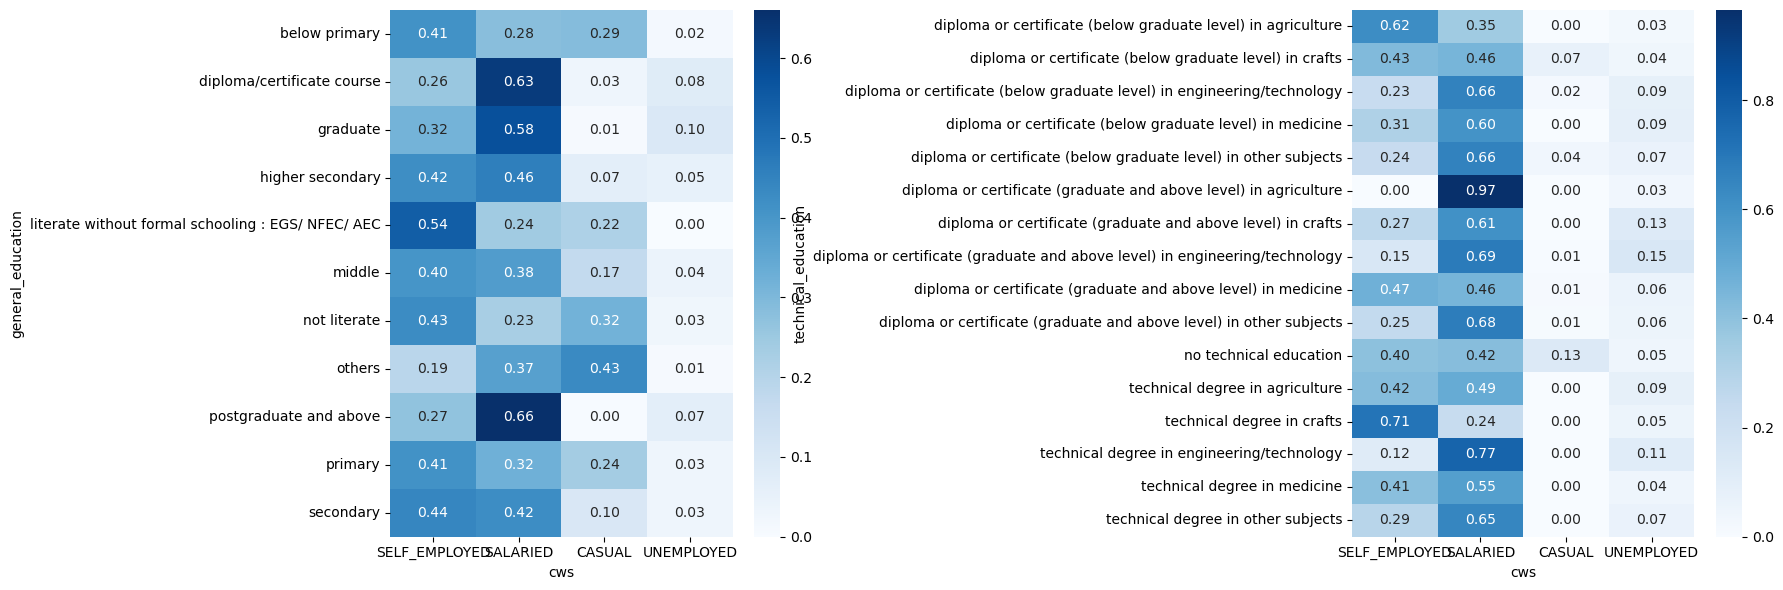

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

z = xdf.groupby(['general_education', 'cws']).apply(lambda x: x[MULT].sum() / xdf[MULT].sum()).unstack()
p2 = z.fillna(value=0)
for cols, name in zip([SELF_EMPLOYED, SALARIED, CASUAL, UNEMPLOYED], ['SELF_EMPLOYED', 'SALARIED', 'CASUAL', 'UNEMPLOYED']):
    p2[name] = p2[cols].sum(axis=1)
    p2.drop(cols, axis=1, inplace=True)
sns.heatmap(p2 / p2.sum(axis=1).values.reshape(-1, 1), annot=True, cmap='Blues', fmt='.2f', ax=ax1)

z = xdf.groupby(['technical_education', 'cws']).apply(lambda x: x[MULT].sum() / xdf[MULT].sum()).unstack()
p2 = z.fillna(value=0)
for cols, name in zip([SELF_EMPLOYED, SALARIED, CASUAL, UNEMPLOYED], ['SELF_EMPLOYED', 'SALARIED', 'CASUAL', 'UNEMPLOYED']):
    p2[name] = p2[cols].sum(axis=1)
    p2.drop(cols, axis=1, inplace=True)

sns.heatmap(p2 / p2.sum(axis=1).values.reshape(-1, 1), annot=True, cmap='Blues', fmt='.2f', ax=ax2)
plt.tight_layout()

<AxesSubplot:ylabel='general_education'>

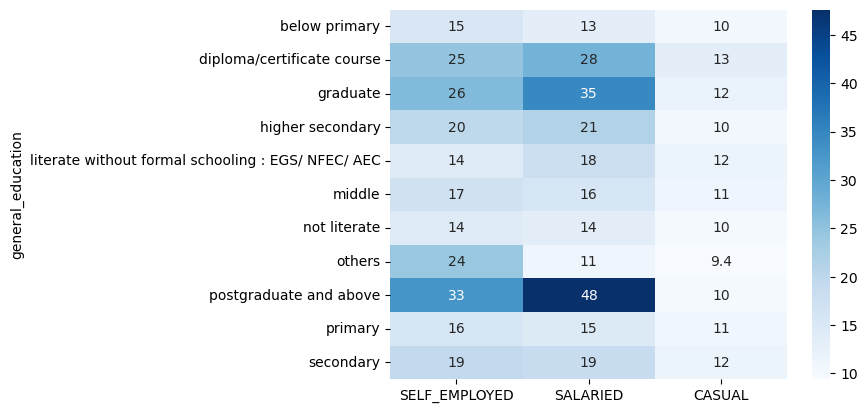

In [60]:
# income?
casual_wages = xdf[xdf['cws'].isin(CASUAL)].groupby('general_education').apply(lambda x: x[[c for c in x if c.startswith('wage_earned_')]].sum(axis=1).mean() * 4)
salaries = xdf[xdf['cws'].isin(SALARIED)].groupby('general_education')['weekly_salaried_earnings'].mean()
earnings = xdf[xdf['cws'].isin(SELF_EMPLOYED)].groupby('general_education')['weekly_self_employed_earnings'].mean()
p3 = pd.concat([earnings, salaries, casual_wages], axis=1).astype(int)
p3.columns = ['SELF_EMPLOYED', 'SALARIED', 'CASUAL']
sns.heatmap(p3 / 1_000, annot=True, cmap='Blues')

<AxesSubplot:>

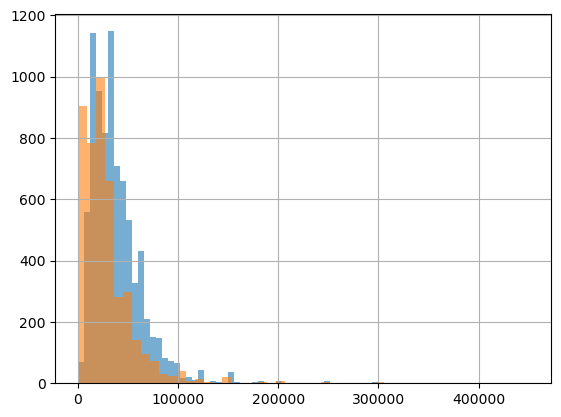

In [77]:
grads = xdf[xdf['general_education'].isin(['graduate', 'postgraduate and above'])]

ax = grads[grads['cws'].isin(SALARIED)]['weekly_salaried_earnings'].hist(bins=50, alpha=0.6)
grads[grads['cws'].isin(SELF_EMPLOYED)]['weekly_self_employed_earnings'].hist(bins=50, ax=ax, alpha=0.6)

In [75]:
grads[grads['cws'].isin(SALARIED)]['weekly_salaried_earnings'].mean()

38073.73551119177